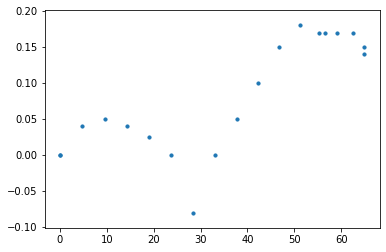

C:\Users\jndrp\anaconda3\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\jndrp\anaconda3\lib\site-packages\ipykernel_launcher.py:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


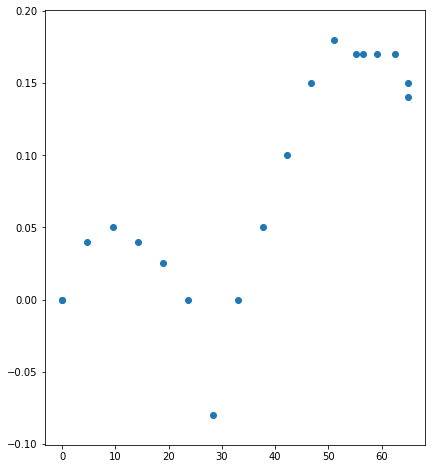

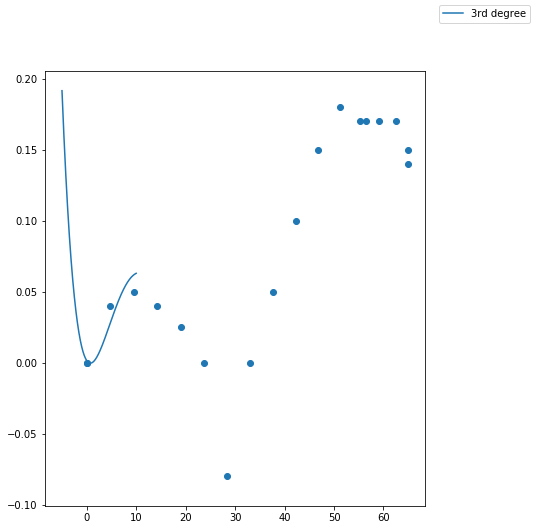

In [13]:
import numpy as np
import copy
import matplotlib.pyplot as plt

def find_solution(matrix,B,n):
    for k in range(n-1):
        for i in range(k+1,n):
                if matrix[i,k] != 0.0:
                    const = matrix[i,k]/matrix[k,k]
                    matrix[i,k+1:n] -= const*matrix[k,k+1:n]
                    B[i] -= const*B[k]
    for k in range(n-1,-1,-1):
        B[k] = (B[k] - np.dot(matrix[k,k+1:n], B[k+1:n]))/matrix[k,k]
    return(B)
def find_mat(x_cood,y_cood,degree):
    degree+=1
    b = []
    mat = []
    for i in range(degree):
        power = i
        row =[]
        for j in range(degree):
            row.append(np.sum(np.power(x_cood,power)))
            power+=1
        power = 0 
        mat.append(row)
        b.append(np.sum(np.multiply(np.power(x_cood,i),y_cood)))
    mat = np.array(mat,  dtype=float)
    b = np.array(b)
    solution = find_solution(mat,b,degree)

    return(solution)

def find_interpolated_func(solution):
    p1 = np.poly1d(solution) 
    x1 = np.linspace(-5,10,1000)
    y1=[]
    for i in x1:
        y1.append(np.polyval(solution[::-1],i))
    # print(y1)
    y1 = np.array(y1)
    return(x1,y1)

# np.random.seed(0)
# x = 2 - 3 * np.random.normal(0, 1, 20)
# y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
x = [0.0, 4.761299896, 9.518925981, 14.26897501, 19.00705378, 23.72794901, 28.42517129, 33.09028195, 37.71184258, 42.27368901, 46.7519386, 51.10947364, 55.28499605, 59.16920319, 62.54620048, 64.92279405, 64.88716528, 56.44106873, 7.01958e-14]
y = [0.0, 0.04, 0.05, 0.04, 0.025, 0.0, -0.08, 0.0, 0.05, 0.1, 0.15, 0.18, 0.17, 0.17, 0.17, 0.14, 0.15, 0.17, 0.0]
plt.scatter(x,y, s=10)
plt.show()


# solution_1 = find_mat(x,y,1)
# solution_2 = find_mat(x,y,2)
solution_3 = find_mat(x,y,7)

# x1,y1 = find_interpolated_func(solution_1)
# x2,y2 = find_interpolated_func(solution_2)
x3,y3 = find_interpolated_func(solution_3)


fig = plt.figure(figsize=(15,8))
fig2 = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig2.add_subplot(122)
ax1.scatter(x,y)
ax2.scatter(x,y)
# ax2.plot(x1,y1, label='1st degree')
# ax2.plot(x2,y2,  label='2nd degree')
ax2.plot(x3,y3,  label='3rd degree')
fig2.legend()
fig.show()
fig2.show()

In [9]:
file = open("extract.txt",'r')
lines = file.readlines()
print(lines)
X=[]
Y=[]

for i in lines:
    x,y = i.strip('\n').split(' ')
    X.append(float(x))
    Y.append(float(y))

print(X,Y)

['0 0\n', '4.761299896 0.04\n', '9.518925981 0.05\n', '14.26897501 0.04\n', '19.00705378 0.025\n', '23.72794901 0\n', '28.42517129 -0.08\n', '33.09028195 0\n', '37.71184258 0.05\n', '42.27368901 0.1\n', '46.7519386 0.15\n', '51.10947364 0.18\n', '55.28499605 0.17\n', '59.16920319 0.17\n', '62.54620048 0.17\n', '64.92279405 0.14\n', '64.88716528 0.15\n', '56.44106873 0.17\n', '7.01958E-14 0\n']
[0.0, 4.761299896, 9.518925981, 14.26897501, 19.00705378, 23.72794901, 28.42517129, 33.09028195, 37.71184258, 42.27368901, 46.7519386, 51.10947364, 55.28499605, 59.16920319, 62.54620048, 64.92279405, 64.88716528, 56.44106873, 7.01958e-14] [0.0, 0.04, 0.05, 0.04, 0.025, 0.0, -0.08, 0.0, 0.05, 0.1, 0.15, 0.18, 0.17, 0.17, 0.17, 0.14, 0.15, 0.17, 0.0]


In [ ]:
import numpy as np
  
# curve-fit() function imported from scipy
from scipy.optimize import curve_fit
  
from matplotlib import pyplot as plt

x = np.array